# Legge di Lambert - Beer <°$\omega$°>        :P

**Informazioni generali.** Misure e caratterizzazioni di una serie di led e costruzione di uno spettro

Dettagli del setup:
* OpAmp AD4661 
* Ad2 per l acquisizione dati
* led, fotodiodi e cuvette specificate sotto
* convertitore tensione-corrente per guidare LED
* amplificatore a trans-impedenza per leggere i dati del fotodiodo

## Progettazione di massima del circuito
La corrente massima di Output dell AD4661 è 40mA, tutti i led a nostra disposizione sostengono una corrente di max 20mA, la resistenza scelta è stata misurata con valore $ 469.87 \pm 1.61\Omega $, il voltaggio massimo in uscita dall AD4661 è di 5V, quindi la corrente massima che può passare attraverso il led è $ \sim 10mA $

Si conoscono le caratteristiche di massa dei vari diodi LED, presentate come


| Colore | Alimentazione($ \pm 0.1 $ V) [V] |
| :-: | :-: |
| rosso | 2.9 |
| arancione | 2.9 |
| giallo | 2.7 |
| verde | 2.3 |
| blu | 2.0 |
| viola | 1.8 |





## Set-up sperimentale

Le misure di due cuvette diverse sono le seguenti, con un incertezza di $\pm 0.05cm$ avendo usato un calibro ventesimale per le misure

|     |cuvetta 1|cuvetta 2|
| :-: | :-: | :-: |
|larghezza in alto [cm]| 12.4 | 12.45 |
|larghezza in basso [cm]|11.90 | 12.00 |
|spessore interno [cm]| 10.4 | 10.4 |

Nei calcoli successivi che richiedevano la larghezza della cuvetta si è considerata la media delle larghezze in alto e in basso $l = 12.2\pm0.1 \mathrm{cm}$

Si sono riempite 5 cuvette con concentrazioni crescenti del liquido in esame, rispettivamente 0% (acqua pura), 25%, 50%, 75%, 100% e queste sono state inserite nel supporto con i lati piatti rivolti verso led e fotodiodo e quelli zigrinati verso l'esterno per evitare diffrazioni parassite.

Assunto che la cuvetta contenete acqua pura non abbia assorbimento di luce, si è presa la misura della fotocorrente generata dall'incidenza della luce del diodo sul fotodiodo come "standard" per tutte le altre misure.
Si è dunque proceduto a prendere misure della fotocorrente per ogni coppia di LED e concentrazione, così da ottenere tutte le intensità disponibili.

Durante queste acquisizioni si è osservato come la fotocorrente presentasse dei plateaux, e questi ultimi sono stati successivamente analizzati.
Data la legge di Lambert-Beer si è potuto ottenere l'assorbanza relativa del liquido in esame tramite logaritmo del quoziente tra presa dati con liquido e presa dati di acqua pura.

% SONO ARRIVATO FINO A QUI %

Durante l acquisizione abbiamo osservato che, a parità di resistenza di feedback, configurando opportunamente il fondoscala per lunghezze d onda maggiori (rosso, aracione, giallo) la corrente sul fotodiodo saturava per lunghezze d onda minori(verde, blu e viola), viceversa settando opportunamente il fondoscala per queste ultime il segnale del fotodiodo delle prime risultava quasi completamente soppresso, abbiamo quindi deciso di utilizzare tre resistenze di feedback diverse, nel seguente modo:


Resistenza per rosso-arancione-giallo $221.72\mathrm{k\Omega}$

Resistenza per verde-blu = $100.3\mathrm{k\Omega}$

Resistenza per viola = $22.131 \mathrm{k\Omega} $

## Stima dell’intensità della luce in W/cm2 a partire dal segnale misurato

Approssimando il diametro del foro attraverso cui si diffonde nella cuvetta il segnale emesso dal led con quello del led, otteniamo un area di $Area = \pi r^2 = \pi 1,5^2 \sim 7.07 \mathrm{mm^2}$, nel datasheet di OSD15 è riportata una assorbanza(?) di 16mA per $\mathrm{mm^2}$, quindi ci aspettiamo un intensità emessa di $7.07\frac{16}{15} \sim 7.54\mathrm{mA}$ 


## Risultati ottenuti

Si sono acquisiti i dati con il programma sweepbias.ipynb, spazzando sul voltaggio in 





































		




0


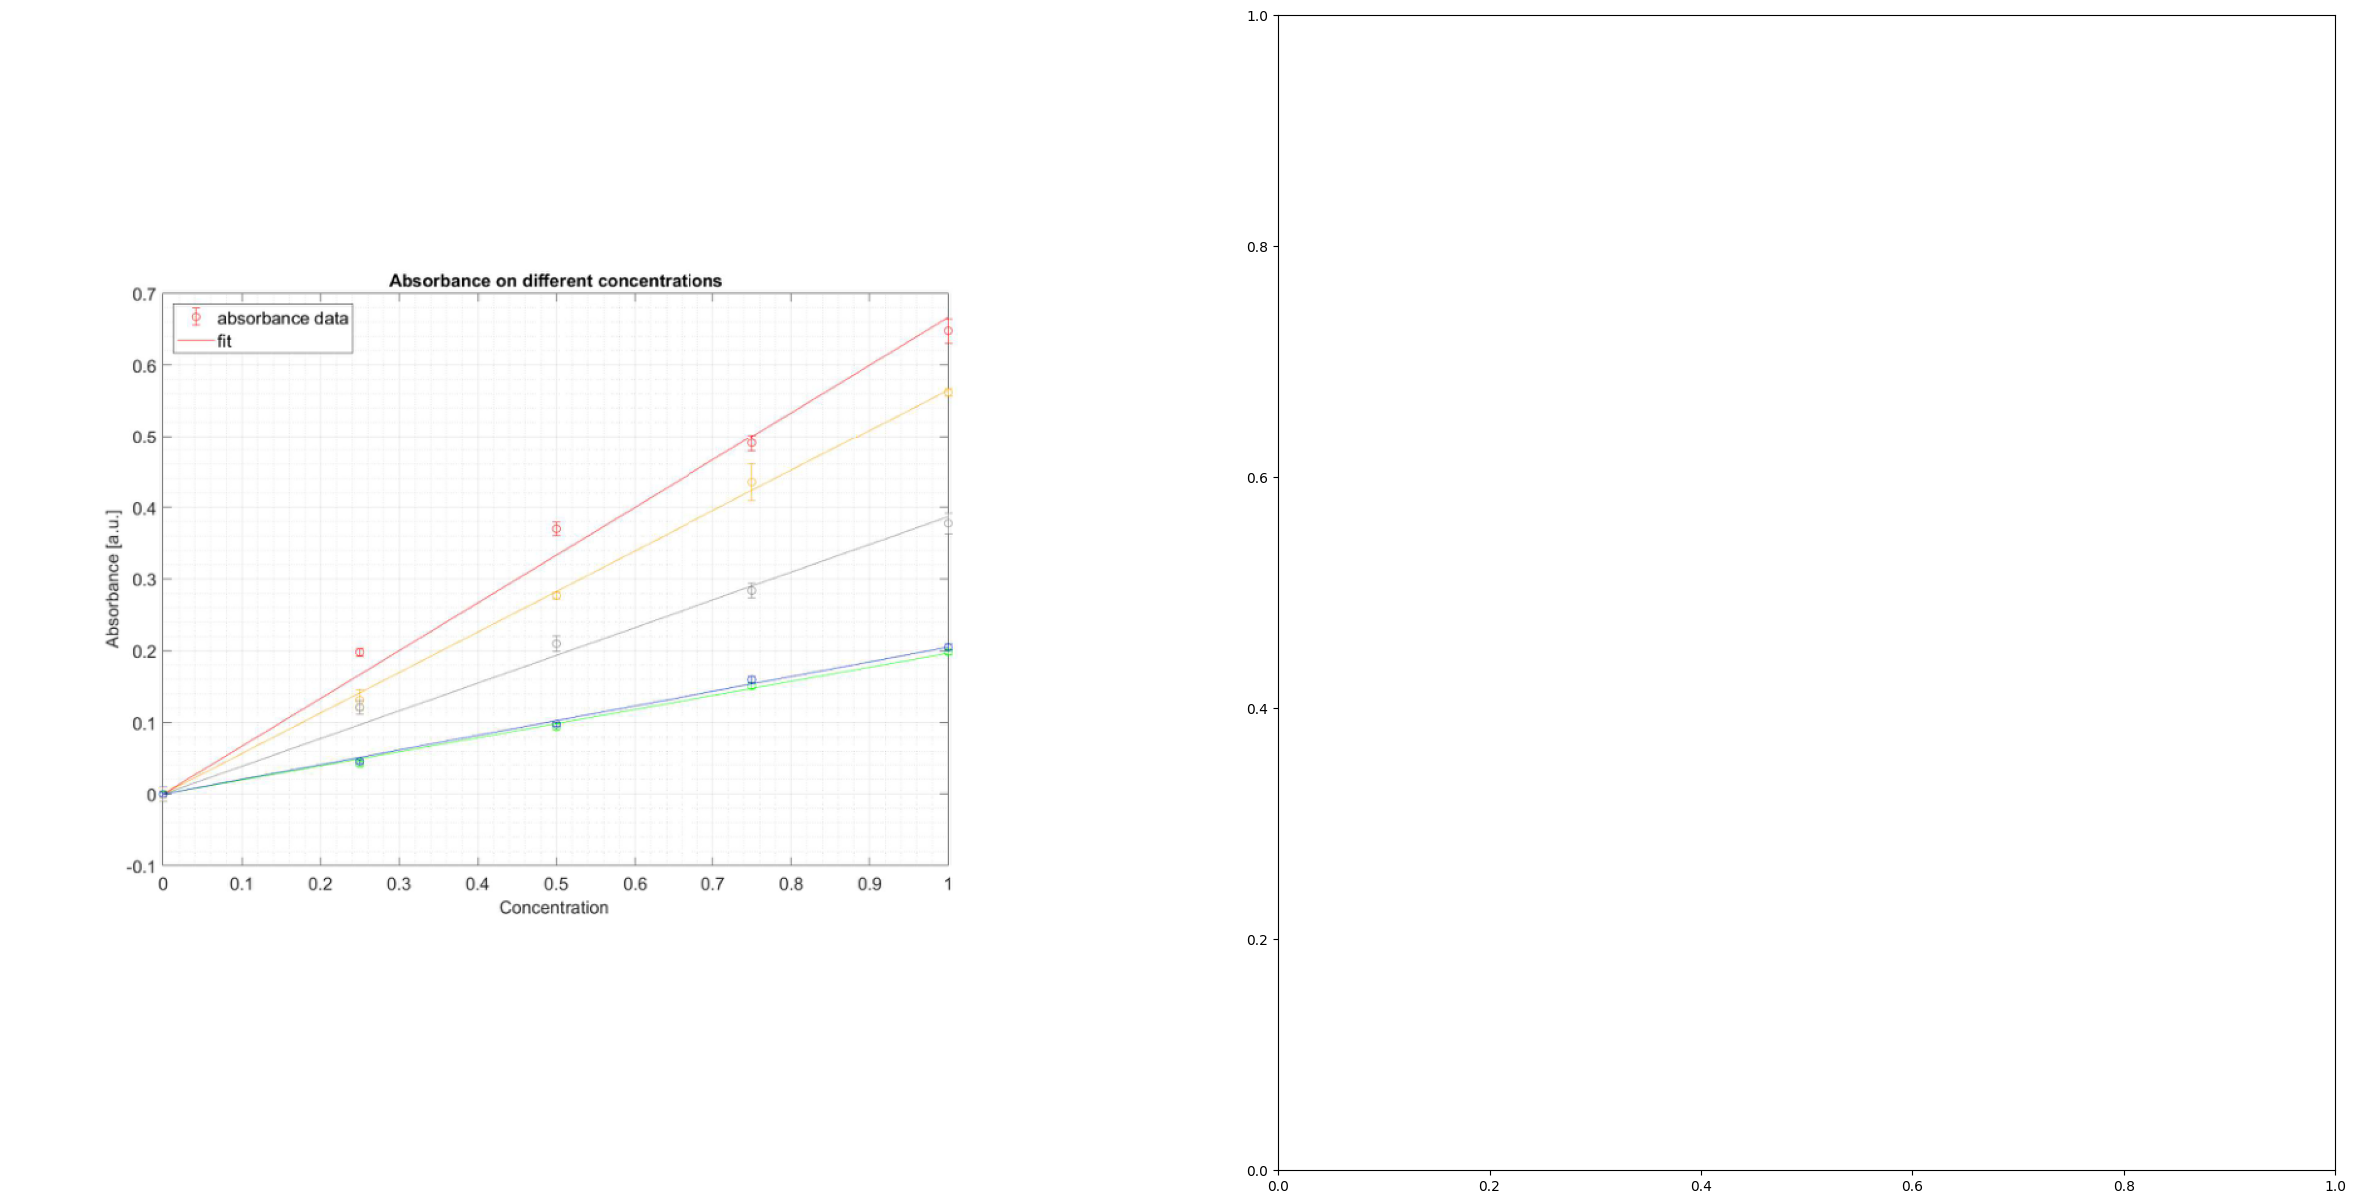

In [20]:
import fitz  # PyMuPDF
from PIL import Image
import matplotlib.pyplot as plt

# Function to convert a PDF page to an image
def pdf_page_to_image(pdf_path, page_num=0):
    pdf_document = fitz.open(pdf_path)
    page = pdf_document.load_page(page_num)  # Load the specified page
    pix = page.get_pixmap()  # Convert page to image
    img = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)
    return img

# Function to display two PDF pages side by side
def display_pdfs_side_by_side(rows, cols, pdfList):
    # Convert all PDF pages to images
    imgList = []
    for pdf in pdfList:
        imgList.append(pdf_page_to_image(pdf))

    # Create a new figure for nxm subplots (n row, m columns)
    if cols == 1 and rows == 1:
        #img = pdf_page_to_image(pdf_path)
        plt.imshow(imgList[0])
        plt.axis('off')
        plt.show()
        return
    
    fig, axes = plt.subplots(rows, cols, figsize=(30, 15), squeeze=False)
    
    # Display the various images

    for i in range(rows):
        print(i)
        if cols == 1:
            try:
                axes[i].imshow(imgList[i])
                axes[i].axis('off')
            except:
                pass
        else:
            for j in range(cols):
                try:
                    axes[i][j].imshow(imgList[i*cols+j])
                    axes[i][j].axis('off')
                except:
                    pass
    plt.show()


# Provide the paths to your two PDFs
pdfList = ['Media/Absorbance.pdf']
rows = 1
cols = 2
display_pdfs_side_by_side(rows, cols, pdfList)


3gyfoiuq3gefo8q3egroy3
 



0


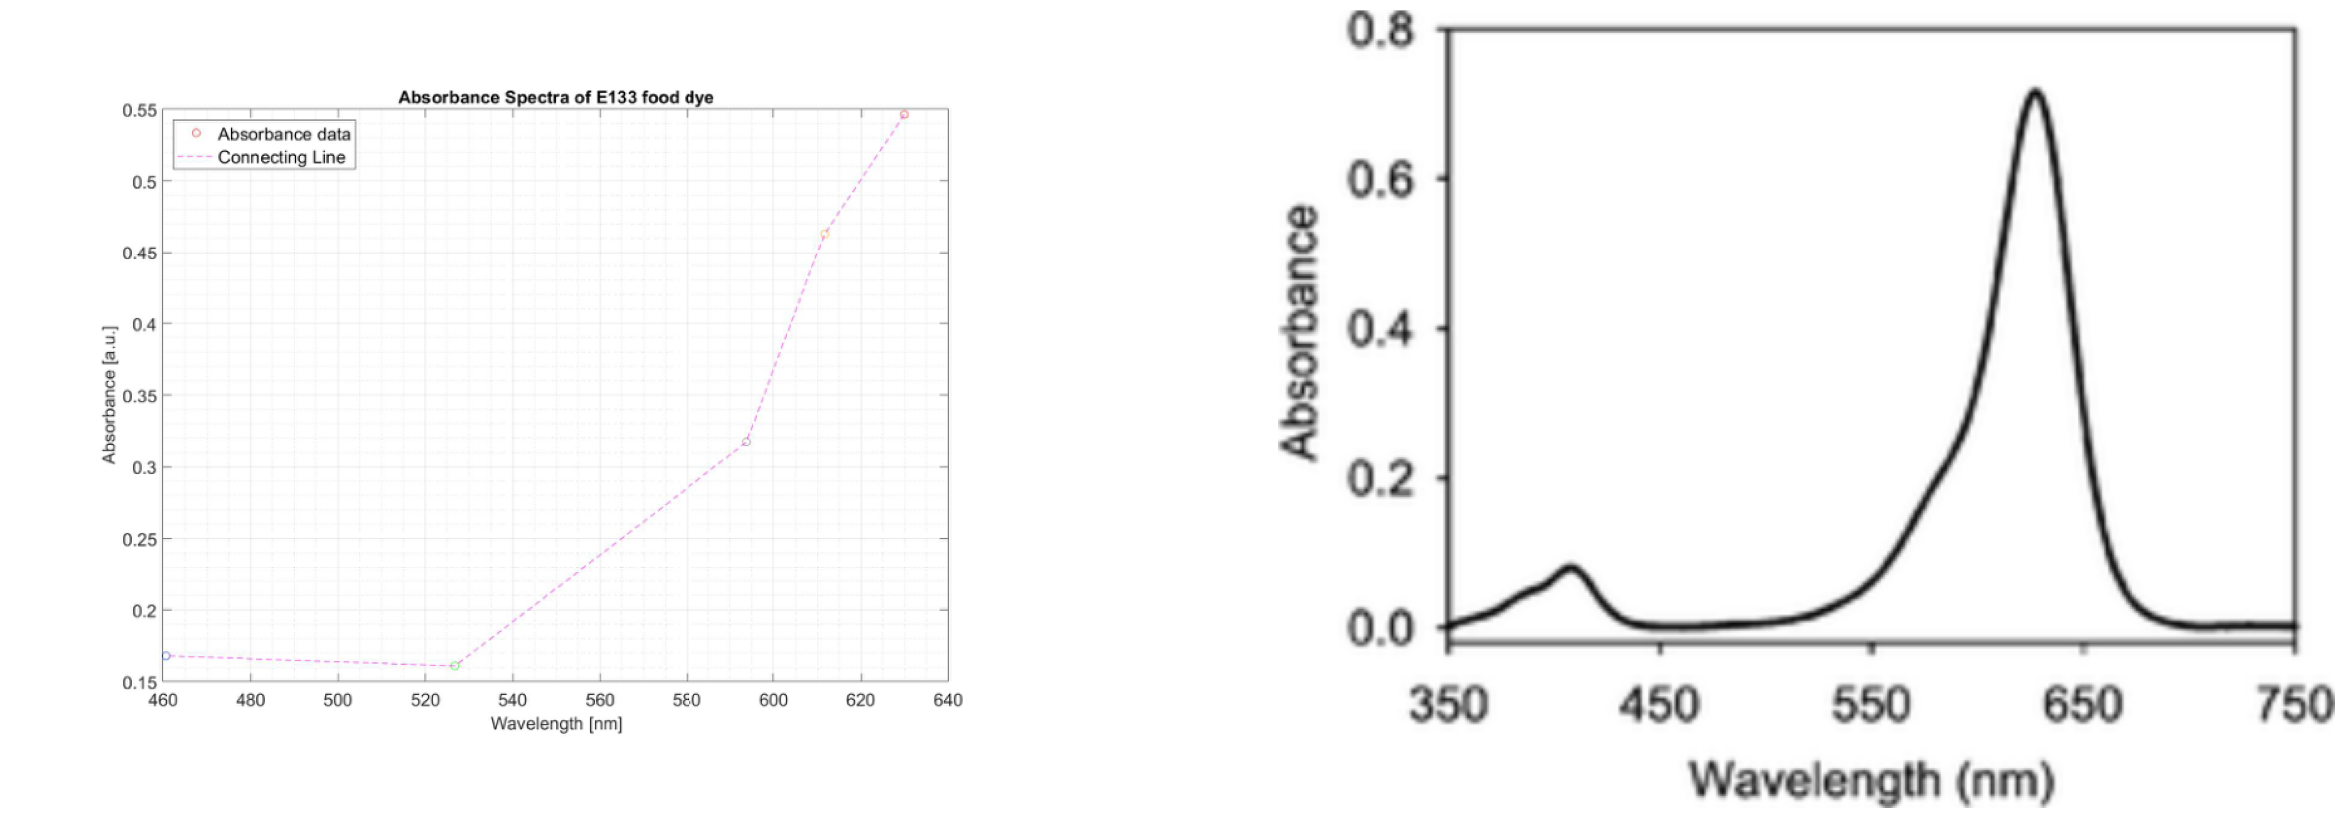

In [ ]:
pdfList = ['Media/MisuraContinua.pdf', 'Media/E133.png']
rows = 1
cols = 2
display_pdfs_side_by_side(rows, cols, pdfList)

Si può notare che nel range di lunghezze d onda analizzabile nell esperienza(460-640 nm) unendo i valori di assorbanza discreti ottenuti dal fit con delle spezzate si ottiene un grafico che riporta un andamento qualitativamente simile allo spettro di assorbanza del colorante alimentare E133. Il massimo dello spettro di assorbanza si ha per 628, compatibile con quanto osservato. Il valore numerico dell assorbanza risulta invece minore, possiamo ipotizzare che parte della luce sia assorbita da altri componenti de gatorade, ad esempio lo zucchero.


## Fonti
 Spettro di assorbanza di E133 https://pubs.rsc.org/en/content/articlelanding/2013/ay/c3ay40362a
 Spettro di assorbanza di glucosio e fruttosio https://www.researchgate.net/figure/Effects-of-a-fructose-b-glucose-and-c-galactose-concentrations-on-UV-Vis-spectra_fig3_308517971

 

